# kesras 3강
1. imdb
2. kfold

In [6]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.5314 - accuracy: 0.7956 - val_loss: 0.4045 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3203 - accuracy: 0.8997 - val_loss: 0.3116 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2350 - accuracy: 0.9237 - val_loss: 0.2830 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1865 - accuracy: 0.9386 - val_loss: 0.2752 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1497 - accuracy: 0.9518 - val_loss: 0.2805 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1223 - accuracy: 0.9628 - val_loss: 0.2911 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1014 - accuracy: 0.9696 - val_loss: 0.3062 - val_accuracy: 0.8839
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


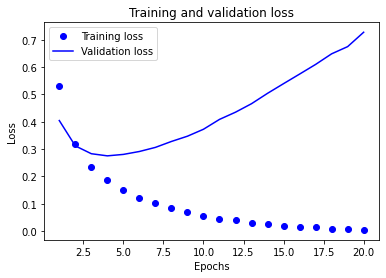

In [19]:
import matplotlib.pyplot as plt

print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

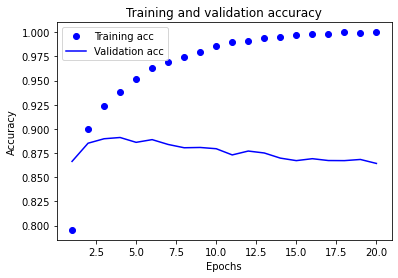

In [22]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 문제점
영화리뷰는 텍스트 데이터고 텍스트 데이터는 단어와 단어사이의 밀접한 연관성을 갖으며 이에 따라서 의미하는 바가 크게 달라지는데 사용되는 단어만을 이용하여 긍정 부정을 예측했기에 90%이상의 정확도를 기록하지 못한 것 같다.
### 해결방안
그러면 어떻게 해결해야할까?  
1. 텍스트 처리에 유리한 RNN모델을 이용하거나 transformer모델을 사용한다.
2. 전처리시 vector로 만들어서 각 단어에 대한 차원을 누락시키기보다 metrix로 만들어 embeding계층을 넣어 처리하는게 좋을 것 같다.
* 이후강의에 나올것으로 예상되는 내용이라 따로 코드를 짜지는 않겠음^^

In [23]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [24]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [30]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [48]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


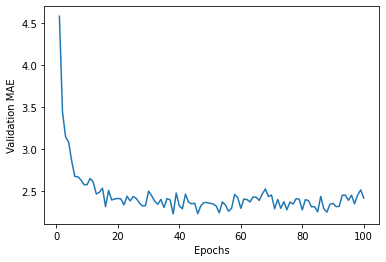

In [49]:
import matplotlib.pyplot as plt
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

어렵네요 ^^;;
### 결론
1. kfold를 이용하면 학습의 편향을 어느정도 제어할 수 있다
2. 최종모델을 만들때는 overfitting을 방지하기 위해 그래프를 찍어보는것도 좋다. 또한 일정분기마다 모델을 저장해 놓고 정확도가 높은 분기의 모델로 돌려놓는 방법도 종종 쓰는것 같다.